In [46]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data_csv= '/content/drive/My Drive/Fertilizer Prediction (2).csv'
df =pd.read_csv(data_csv)
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [48]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [49]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [50]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [51]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [52]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [53]:
df['Soil Type'] = df['Soil Type'].map({'Sandy' : 0, 'Loamy' : 1, 'Black' : 2, 'Red' : 3, 'Clayey' : 4})
df['Crop Type'] = df['Crop Type'].map({'Maize':0, 'Sugarcane':1, 'Cotton':2, 'Tobacco':3, 'Paddy':4, 'Barley':5,'Wheat':6, 'Millets':7, 'Oil seeds':8, 'Pulses':9, 'Ground Nuts':10})
df['Fertilizer Name'] = df['Fertilizer Name'].map({'Urea':0, 'DAP':1, '14-35-14':2, '28-28':3, '17-17-17':4, '20-20':5,'10-26-26':6})
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0,0,37,0,0,0
1,29,52,45,1,1,12,0,36,1
2,34,65,62,2,2,7,9,30,2
3,32,62,34,3,3,22,0,20,3
4,28,54,46,4,4,35,0,0,0
...,...,...,...,...,...,...,...,...,...
94,25,50,32,4,9,24,0,19,3
95,30,60,27,3,3,4,17,17,6
96,38,72,51,1,6,39,0,0,0
97,36,60,43,0,7,15,0,41,1


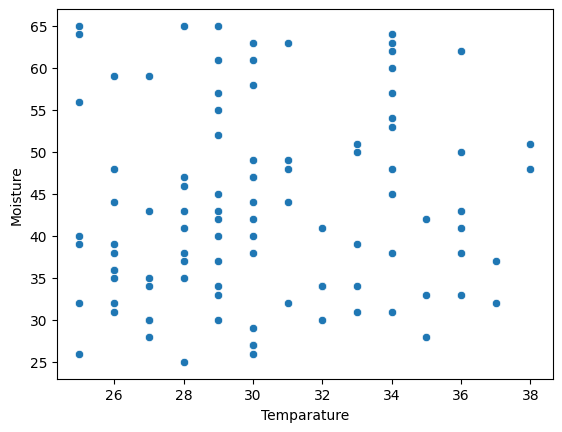

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='Temparature',y='Moisture',data=df)
plt.show()

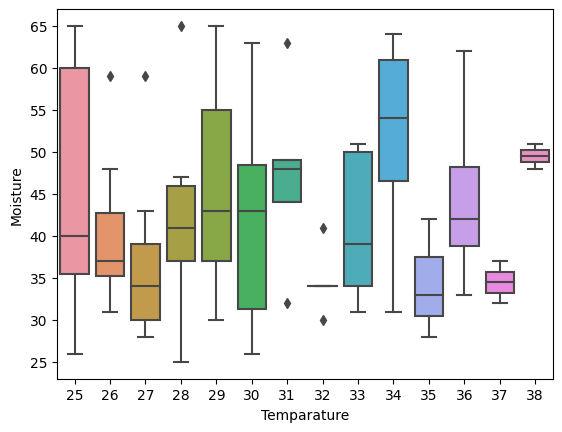

In [61]:
sns.boxplot(x='Temparature', y='Moisture', data=df)
plt.show()

In [55]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from sklearn.model_selection import *
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_val, y_train, y_val)
model.sort_values('Accuracy', ascending = False)

100%|██████████| 29/29 [00:01<00:00, 25.00it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.05
XGBClassifier,1.00,1.00,None,1.00,0.11
DecisionTreeClassifier,1.00,1.00,None,1.00,0.01
RandomForestClassifier,1.00,1.00,None,1.00,0.19
LogisticRegression,1.00,1.00,None,1.00,0.03
ExtraTreesClassifier,1.00,1.00,None,1.00,0.15
GaussianNB,1.00,1.00,None,1.00,0.02
BaggingClassifier,1.00,1.00,None,1.00,0.03
LinearSVC,0.93,0.93,None,0.93,0.02


In [ ]:
'''import pandas as pd
import pickle
with open('model_filename.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


print("Please provide the following information:")
temperature = float(input("Temperature: "))
humidity = float(input("Humidity: "))
moisture = float(input("Moisture: "))
soil_type = input("Soil Type: ")
crop_type = input("Crop Type: ")
nitrogen = float(input("Nitrogen: "))
potassium = float(input("Potassium: "))
phosphorous = float(input("Phosphorous: "))

new_instance = pd.DataFrame([[temperature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous]],
                            columns=['Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous'])
prediction = loaded_model.predict(new_instance)

print("Predicted Fertilizer:", prediction)'''

In [60]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

X = df.drop('Fertilizer Name', axis=1) 
y = df['Fertilizer Name']  

model = LogisticRegression()
model.fit(X, y)
temparature = float(input('Enter the temperature: '))
humidity = float(input('Enter the humidity: '))
moisture = float(input('Enter the moisture: '))
soil_type = input('Enter the soil type: ')
crop_type = input('Enter the crop type: ')
nitrogen = float(input('Enter the nitrogen level: '))
potassium = float(input('Enter the potassium level: '))
phosphorous = float(input('Enter the phosphorous level: '))

new_instance = pd.DataFrame({
    'Temparature': [temparature],
    'Humidity ': [humidity],
    'Moisture': [moisture],
    'Soil Type': [soil_type],
    'Crop Type': [crop_type],
    'Nitrogen': [nitrogen],
    'Potassium': [potassium],
    'Phosphorous': [phosphorous]
})
prediction = model.predict(new_instance)
data = prediction[0]
mapping = {
    0: 'Urea',
    1: 'DAP',
    2: '14-35-14',
    3: '28-28',
    4: '17-17-17',
    5: '20-20',
    6: '10-26-26'
}

if data in mapping:
    out = mapping[data]
    print('Predicted Fertilizer Name: ',out)

Enter the temperature: 1
Enter the humidity: 1
Enter the moisture: 1
Enter the soil type: 1
Enter the crop type: 1
Enter the nitrogen level: 1
Enter the potassium level: 1
Enter the phosphorous level: 1
Predicted Fertilizer Name:  10-26-26
